In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import nltk
import re
import string

In [71]:
data = pd.read_csv("D:/MACHINE LEARNING/CSV DATASET/Dataset-SA.csv")
print(data.head())
print(data.isnull().sum())

                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  
product_name         0
pro

In [72]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [74]:
data["Review"] = data["Review"].apply(clean)

In [75]:
sentiments = SentimentIntensityAnalyzer()

In [76]:
data["Positive"] = data["Review"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
data["Negative"] = data["Review"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
data["Neutral"] = data["Review"].apply(lambda x: sentiments.polarity_scores(x)["neu"])

In [77]:
ratings = data[['Positive', 'Negative', 'Neutral']].mean()

In [78]:
print(ratings)

Positive    0.372651
Negative    0.037572
Neutral     0.589743
dtype: float64


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



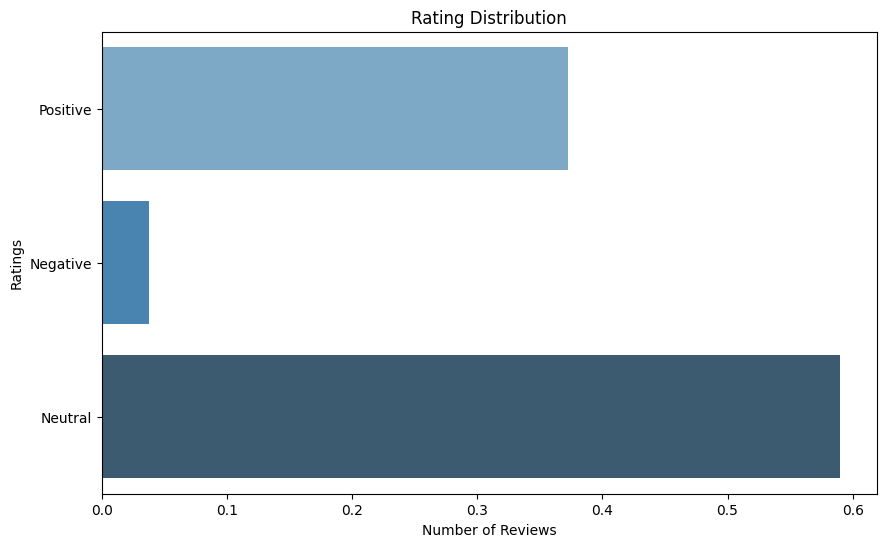

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(y=ratings.index, x=ratings.values, palette="Blues_d", orient='h')
plt.title("Rating Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Ratings")
plt.show()

In [80]:
numbers = ratings.index
quantity = ratings.values
figure = px.pie(data, 
                values=quantity, 
                names=numbers, 
                hole=0.5, 
                title="Distribution of Ratings")
figure.show()

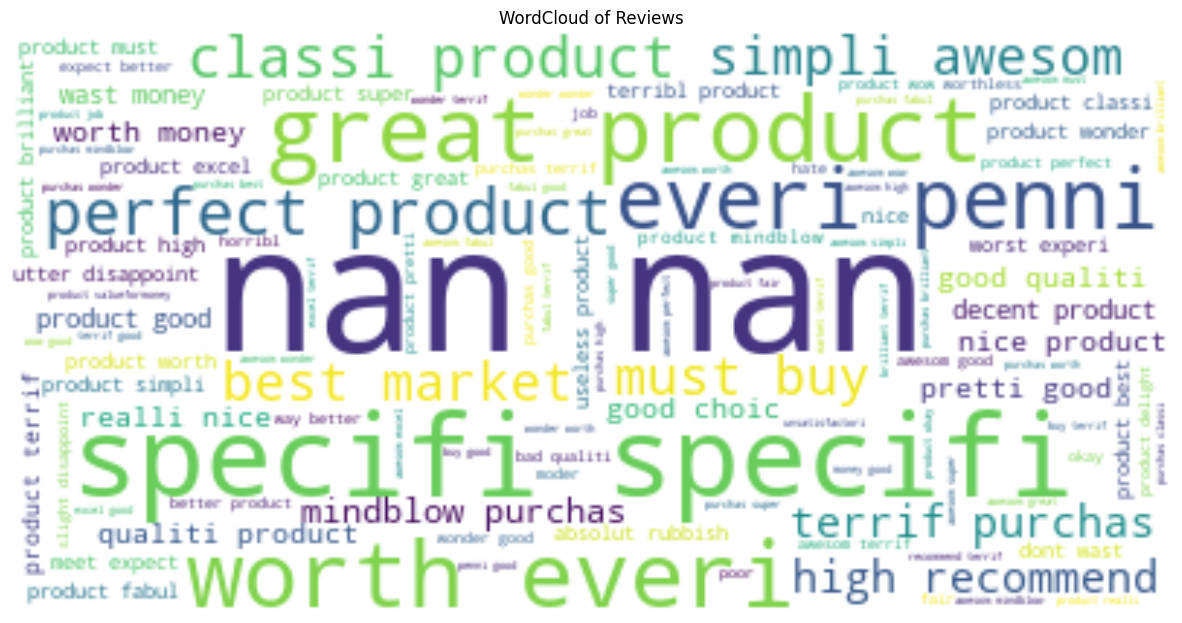

In [82]:
text = " ".join(i for i in data.Review)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Reviews")
plt.show()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



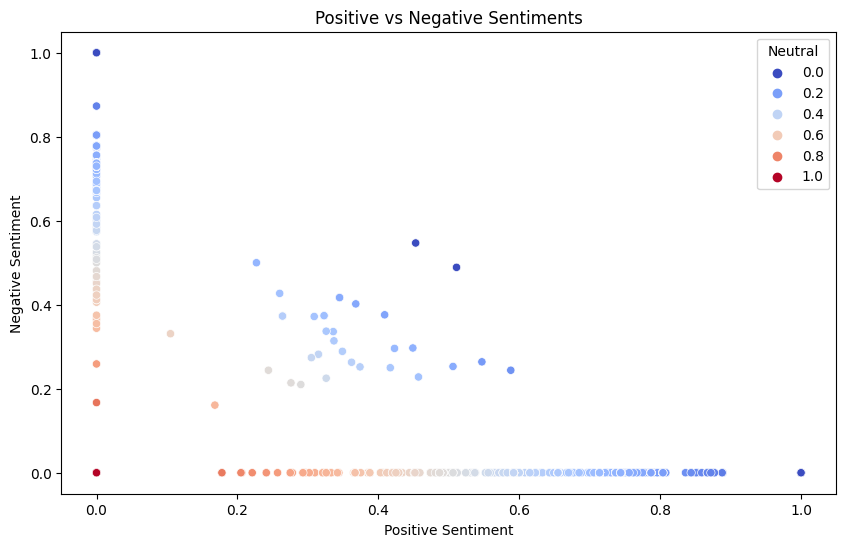

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data["Positive"], y=data["Negative"], hue=data["Neutral"], palette="coolwarm")
plt.title("Positive vs Negative Sentiments")
plt.xlabel("Positive Sentiment")
plt.ylabel("Negative Sentiment")
plt.show()

In [84]:
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


In [85]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

In [86]:
def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print("Overall Sentiment: Positive 😊")
    elif (b > a) and (b > c):
        print("Overall Sentiment: Negative 😠")
    else:
        print("Overall Sentiment: Neutral 🙂")
sentiment_score(x, y, z)

Overall Sentiment: Neutral 🙂


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_q

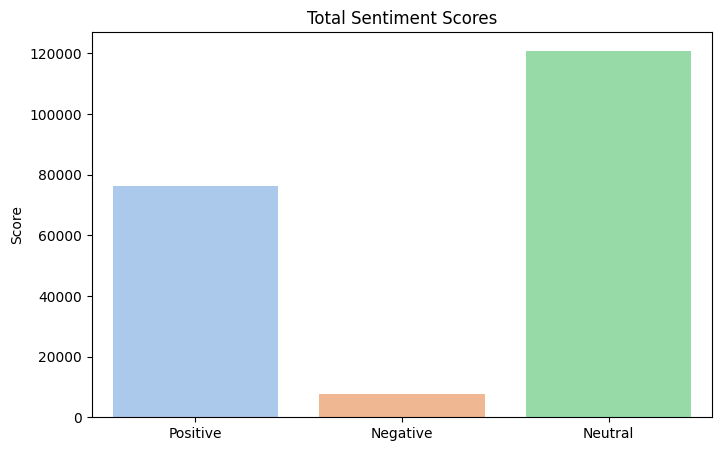

In [87]:
total_sentiments = {'Positive': x, 'Negative': y, 'Neutral': z}
plt.figure(figsize=(8,5))
sns.barplot(x=list(total_sentiments.keys()), y=list(total_sentiments.values()), palette="pastel")
plt.title("Total Sentiment Scores")
plt.ylabel("Score")
plt.show()

In [88]:
print("Positive Sentiment: ", x)
print("Negative Sentiment: ", y)
print("Neutral Sentiment: ", z)

Positive Sentiment:  76412.76899997835
Negative Sentiment:  7704.235999999504
Neutral Sentiment:  120927.99799999218
